# Emotion Detector

In [7]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [8]:

!pip install matplotlib opencv-python ipython tensorflow keras pydot graphviz
#importing libraries
!pip install opencv-python

import matplotlib.pyplot as plt
from glob import glob            #for creating list
import cv2
import random
#for no errors while plotting the graphs
%matplotlib inline   
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D
from tensorflow.keras.layers import BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG,Image
import tensorflow as tf
print("Tensorflow version:",tf.__version__)

ModuleNotFoundError: No module named 'cv2'

In [ ]:
# Image and batch size
img_size = 48  # Images are of 48x48 pixels
batch_size = 64
epochs = 15

# Data generators for training and validation
datagen_train = ImageDataGenerator(rescale=1./255)  # Normalize pixel values
train_generator = datagen_train.flow_from_directory(
    "train/",
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

datagen_validation = ImageDataGenerator(rescale=1./255)  # Normalize pixel values
validation_generator = datagen_validation.flow_from_directory(
    "test/",
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
# Convolution layer function
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.3)(x)
    return x

# Dense layer function
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)
    return x

# Model definition
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 64, (3, 3))
    conv_2 = Convolution(conv_1, 128, (5, 5))
    conv_3 = Convolution(conv_2, 256, (3, 3))
    flatten = Flatten()(conv_3)
    dense_1 = Dense_f(flatten, 512)
    output = Dense(7, activation="softmax")(dense_1)
    model = Model(inputs=[inputs], outputs=[output])
    optimizer = Adam(learning_rate=0.0003)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
# Build and summarize the model
model = model_fer((48, 48, 1))
model.summary()

# Set the steps per epoch
steps_per_epoch = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size

# ModelCheckpoint callback
checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor="val_accuracy", save_weights_only=True, mode="max", verbose=1)
callbacks = [checkpoint]

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       4,719,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,227,271 (19.94 MB)

 Trainable params: 5,225,351 (19.93 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
# Train the model
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)

Epoch 1/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 929ms/step - accuracy: 0.2808 - loss: 1.9668
Epoch 1: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 449s 989ms/step - accuracy: 0.2809 - loss: 1.9664 - val_accuracy: 0.3104 - val_loss: 1.7734
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 6:49 917ms/step - accuracy: 0.3750 - loss: 1.6159
Epoch 2: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.3750 - loss: 1.6159 - val_accuracy: 0.2000 - val_loss: 1.6883
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 922ms/step - accuracy: 0.4015 - loss: 1.5824
Epoch 3: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 440s 983ms/step - accuracy: 0.4015 - loss: 1.5824 - val_accuracy: 0.4588 - val_loss: 1.4224
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 8:36 1s/step - accuracy: 0.4219 - loss: 1.5983
Epoch 4: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 601us/step - accuracy: 0.4219 - loss: 1.5983 - val_acc

In [ ]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 27s 236ms/step - accuracy: 0.5651 - loss: 1.1601


[1.1499131917953491, 0.5741153359413147]

## Visualizing Accuracy and Loss

In [ ]:
accuracy = history.history['accuracy'] 
val_accuracy = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

#### Plotting loss

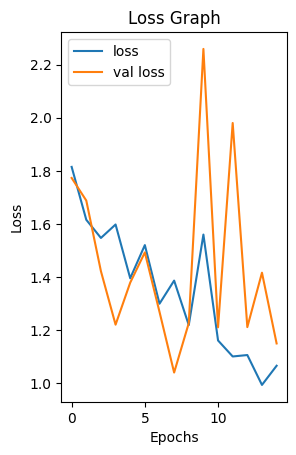

In [ ]:
plt.subplot(1, 2, 2) 
plt.plot(loss, label='loss') 
plt.plot(val_loss, label='val loss') 
plt.title('Loss Graph') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()

#### Plotting Accuracy

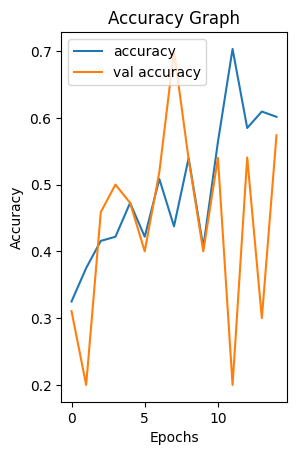

In [ ]:
plt.subplot(1, 2, 1) 
plt.plot(accuracy, label='accuracy') 
plt.plot(val_accuracy, label='val accuracy') 
plt.title('Accuracy Graph') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 

### Saving the model

In [ ]:
model_json = model.to_json() 
with open("emotion_model.json", "w") as json_file: 
	json_file.write(model_json) 

# save trained model weight in .h5 file 
model.save_weights('emotion_model.weights.h5') 

In [ ]:
model.save("emotion_model.keras")
